<a href="https://colab.research.google.com/github/bfeijoj/Cat-Dog-CNN-Classifier/blob/main/cat_or_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def plot_function(images_array, probabilities = False):
    fig, axes = plt.subplots(len(images_array), 1, figsize=(5,len(images_array) * 3))
    if probabilities is False:
      for img, ax in zip(images_array, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip(images_array, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

In [ ]:
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

path = 'cats_and_dogs'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
test_dir = os.path.join(path, 'test')

total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [6]:
# -------------------------------------------------------------------------------------- Pre processing and training variables -----------------------------------------------------------------------------

batch_size = 128
epochs = 15
image_height = 150
image_width = 150


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
Found 2000 images belonging to 2 classes.
9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
___________

In [ ]:
# ----------------------------------------------------------------------------------------------- New images generator -------------------------------------------------------------------------------------

train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
        train_dir,
        target_size = (image_height, image_width),
        batch_size = batch_size,
        class_mode = 'binary',
        classes = ['cats', 'dogs'])

val_data_gen = validation_image_generator.flow_from_directory(
        validation_dir,
        target_size = (image_height, image_width),
        batch_size = batch_size,
        class_mode = 'binary',
        classes = ['cats', 'dogs'])

test_data_gen = test_image_generator.flow_from_directory(
        path,
        classes = ['test'],
        target_size = (image_height, image_width),
        batch_size = batch_size,
        shuffle = False,
        class_mode = None)

train_image_generator = ImageDataGenerator(
rescale = 1./255,
rotation_range = 40,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
fill_mode = 'nearest')

train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                     directory = train_dir,
                                                     target_size = (image_height, image_width),
                                                     class_mode = 'binary',
                                                     classes = ['cats', 'dogs'])

In [ ]:
# --------------------------------------------------------------------------------------------------- CNN Architecture ------------------------------------------------------------------------------------

base_model = tf.keras.applications.MobileNetV2(input_shape=(image_height, image_width, 3), include_top=False, weights="imagenet")
base_model.trainable = False

model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(1)
])

base_learning_rate = 0.0001

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = base_learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.summary()

Epoch 1/15
15/15 [==============================] - 62s 3s/step - loss: 0.9467 - accuracy: 0.4546 - val_loss: 0.8015 - val_accuracy: 0.5513
Epoch 2/15
15/15 [==============================] - 54s 4s/step - loss: 0.8147 - accuracy: 0.5475 - val_loss: 0.6661 - val_accuracy: 0.6362
Epoch 3/15
15/15 [==============================] - 52s 3s/step - loss: 0.6947 - accuracy: 0.6229 - val_loss: 0.5901 - val_accuracy: 0.7054
Epoch 4/15
15/15 [==============================] - 52s 3s/step - loss: 0.6348 - accuracy: 0.6683 - val_loss: 0.5099 - val_accuracy: 0.7478
Epoch 5/15
15/15 [==============================] - 54s 4s/step - loss: 0.5566 - accuracy: 0.7142 - val_loss: 0.4431 - val_accuracy: 0.8025
Epoch 6/15
15/15 [==============================] - 53s 4s/step - loss: 0.5092 - accuracy: 0.7393 - val_loss: 0.3887 - val_accuracy: 0.8326
Epoch 7/15
15/15 [==============================] - 53s 4s/step - loss: 0.4830 - accuracy: 0.7682 - val_loss: 0.3573 - val_accuracy: 0.8538
Epoch 8/15
15/15 [==

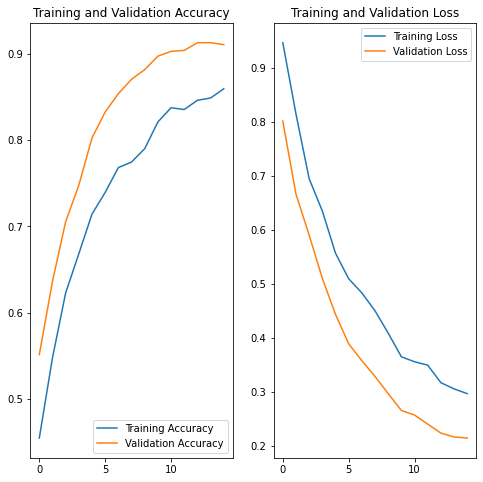

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [7]:
# -------------------------------------------------------------------------------------------------------- Training ---------------------------------------------------------------------------------------

history = model.fit(train_data_gen,
                    epochs = epochs,
                    steps_per_epoch = total_train // batch_size,
                    validation_data = val_data_gen,
                    validation_steps = total_val // batch_size)

accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('cat_or_dog.h5')

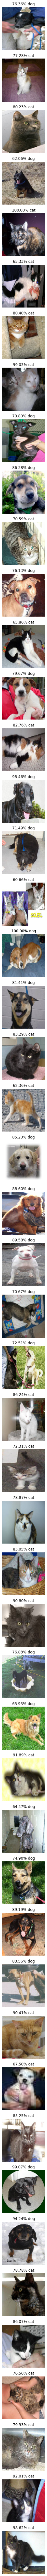

In [12]:
# -------------------------------------------------------------------------------------------------------- Predicting -------------------------------------------------------------------------------------

new_model = tf.keras.models.load_model('cat_or_dog.h5')

predictions = new_model.predict(test_data_gen)

sample_test_images = [test_data_gen[0][ii][:] for ii in range(50)]

predictions = (predictions - min(predictions)) / (max(predictions) - min(predictions))

plot_function(sample_test_images, probabilities = predictions)